# Description

It analyzes how consensus partitions generated before agree with the ensemble, and selects the best ones for downstream analyses.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [ ]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"], "shuffle_genes"

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    NULL_DIR, "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(413, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.032836,0.000759,0.079661,0.103021,0.000885,0.158743,0.107238,0.011330,0.156970
1,scc_030,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",3,0.046161,0.000639,0.096002,0.138659,0.001607,0.210192,0.144101,0.014974,0.208010
2,scc_030,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",4,0.074265,0.000290,0.144091,0.170631,0.001316,0.260114,0.176943,0.012918,0.257522
3,scc_030,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",5,0.088752,0.000292,0.164617,0.186808,0.001294,0.285126,0.193837,0.012199,0.282227
4,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",6,0.094984,0.000917,0.172872,0.194309,0.002086,0.296132,0.202020,0.013793,0.293024


# Explore clustering indexes

In [8]:
_col = "ari_mean"

_best_parts_by_ari = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col, ascending=False).head(1))
    .sort_values(_col, ascending=False)[["method", "k", _col]]
    .rename(columns={_col: "index_value"})
)

In [9]:
_col = "ami_mean"

_best_parts_by_ami = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col, ascending=False).head(1))
    .sort_values(_col, ascending=False)[["method", "k", _col]]
    .rename(columns={_col: "index_value"})
)

In [10]:
_col = "nmi_mean"

_best_parts_by_nmi = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col, ascending=False).head(1))
    .sort_values(_col, ascending=False)[["method", "k", _col]]
    .rename(columns={_col: "index_value"})
)

In [11]:
_indexes_colors = sns.color_palette("colorblind", 3)
display(_indexes_colors)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275)]

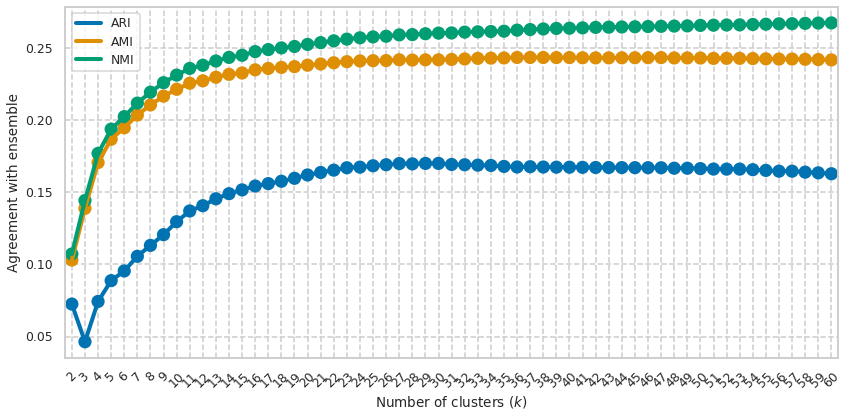

In [12]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.pointplot(
        data=_best_parts_by_ari,
        x="k",
        y="index_value",
        color=_indexes_colors[0],
        ci=None,
    )
    ax = sns.pointplot(
        data=_best_parts_by_ami,
        x="k",
        y="index_value",
        color=_indexes_colors[1],
        ci=None,
    )
    ax = sns.pointplot(
        data=_best_parts_by_nmi,
        x="k",
        y="index_value",
        color=_indexes_colors[2],
        ci=None,
    )

    ax.set_ylabel(f"Agreement with ensemble")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["ARI", "AMI", "NMI"])
    plt.grid(True)
    plt.tight_layout()

AMI and NMI show the same trend for higher `k`. That's surprising. I would have expected that AMI has the same pattern as ARI, since both are adjusted-for-chance, and should not show higher values for higher `k` as it is expected for a not adjusted-for-chance index as NMI.

**CONCLUSION:** I will pick ARI for the follow up analysis.

# Explore best partition per k

In [13]:
_selected_measure = "ARI"
_mean_column, _median_column = "ari_mean", "ari_median"

In [14]:
best_parts_by_mean = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_mean_column, ascending=False).head(1))
    .sort_values(_mean_column, ascending=False)[["method", "k", _mean_column]]
)
display(best_parts_by_mean.head(10))

,,method,k,ari_mean
k,,,,
30,28,scc_030,30,0.170077
29,145,scc_025,29,0.170064
27,143,scc_025,27,0.169939
28,144,scc_025,28,0.169740
31,147,scc_025,31,0.169343
26,260,scc_050,26,0.169153
32,266,scc_050,32,0.169142
33,267,scc_050,33,0.168859
34,268,scc_050,34,0.168648


In [15]:
best_parts_by_median = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_median_column, ascending=False).head(1))
    .sort_values(_median_column, ascending=False)[["method", "k", _median_column]]
)
display(best_parts_by_median.head(10))

,,method,k,ari_median
k,,,,
9,361,eac_complete_coassoc_matrix,9,0.018457
8,360,eac_complete_coassoc_matrix,8,0.018031
7,359,eac_complete_coassoc_matrix,7,0.018015
6,358,eac_complete_coassoc_matrix,6,0.017854
10,362,eac_complete_coassoc_matrix,10,0.017032
12,364,eac_complete_coassoc_matrix,12,0.013556
11,363,eac_complete_coassoc_matrix,11,0.013367
13,365,eac_complete_coassoc_matrix,13,0.008930
14,366,eac_complete_coassoc_matrix,14,0.004427


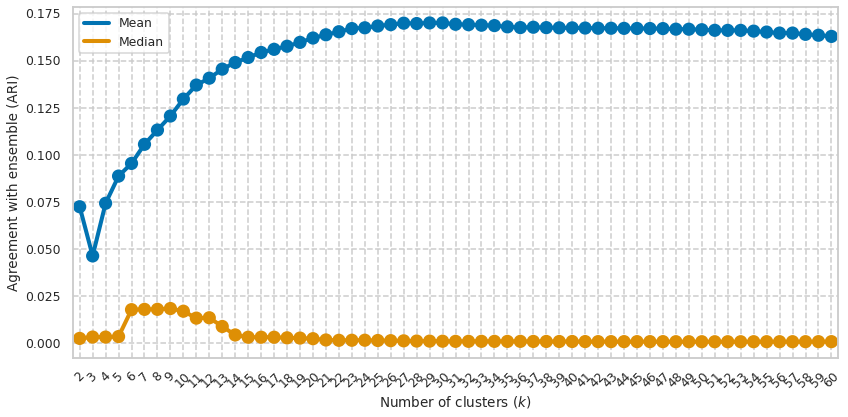

In [16]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax = sns.pointplot(
        data=best_parts_by_mean,
        x="k",
        y=_mean_column,
        ci=None,
        color=_indexes_colors[0],
        label="Mean",
    )
    ax = sns.pointplot(
        data=best_parts_by_median,
        x="k",
        y=_median_column,
        ci=None,
        color=_indexes_colors[1],
        label="Median",
        ax=ax,
    )
    ax.set_ylabel(f"Agreement with ensemble ({_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

Both central tendency measures (the mean and the median) have the same behevior: higher agreement on lower/medium k values, and lower agreement on higher k values.

# Which consensus method performs better?

For this comparison, I take the partitions with an agreement higher than the 75th percentile. From this set, I count how many times each method won.

## Using best by mean

In [17]:
_stats_data = best_parts_by_mean[_mean_column].describe()
display(_stats_data)

count    59.000000
mean      0.153270
std       0.028026
min       0.046386
25%       0.155213
50%       0.166114
75%       0.167471
max       0.170077
Name: ari_mean, dtype: float64

In [18]:
best_parts_by_mean[best_parts_by_mean[_mean_column] > _stats_data["75%"]][
    "method"
].value_counts()

scc_050                       7
scc_025                       4
eac_average_coassoc_matrix    3
scc_030                       1
Name: method, dtype: int64

SCC picked the "best partition" 14 times, whereas EAC (hierarhical clustering) did it only once.

## Using best by median

In [19]:
_stats_data = best_parts_by_median[_median_column].describe()
display(_stats_data)

count    59.000000
mean      0.003423
std       0.005103
min       0.000831
25%       0.000887
50%       0.001050
75%       0.003065
max       0.018457
Name: ari_median, dtype: float64

In [20]:
best_parts_by_median[best_parts_by_median[_median_column] > _stats_data["75%"]][
    "method"
].value_counts()

eac_complete_coassoc_matrix    15
Name: method, dtype: int64

If we use the "best partitions by median", EAC (HC) picked the best one 5 times, whereas SCC did it 10 times.

**CONCLUSION:** we select SCC as the method for follow up analysis.

# Select best partition per k

In [21]:
_selected_stat = "Median"
_measure_col = _median_column

In [22]:
best_parts = (
    consensus_clustering_results[
        consensus_clustering_results["method"].str.startswith("scc_")
    ]
    .groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [23]:
best_parts = best_parts.set_index("k")

In [24]:
best_parts.shape

(59, 3)

In [25]:
# show partitions with top values
best_parts.head(10)

,method,partition,ari_median
k,,,
6,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000946
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000759
3,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000726
7,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000703
8,scc_050,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000605
45,scc_025,"[27, 27, 11, 27, 27, 27, 27, 27, 27, 27, 27, 2...",0.000553
31,scc_050,"[21, 21, 18, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000549
33,scc_050,"[11, 11, 24, 11, 11, 11, 11, 11, 11, 11, 11, 1...",0.000540
36,scc_050,"[28, 28, 13, 28, 28, 28, 28, 28, 28, 28, 28, 2...",0.000531


In [26]:
best_parts.sort_values("k")

,method,partition,ari_median
k,,,
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000759
3,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000726
4,scc_020,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.000374
5,scc_025,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...",0.000300
6,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000946
7,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000703
8,scc_050,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000605
9,scc_020,"[4, 4, 4, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",0.000328
10,scc_050,"[6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.000460


## Select partitions with highest agreement

We do not expect all partitions with different `k` to be good ones. Thus, here I select the partitions with an ensemble agreement that pass a relative high threshold (75th percentile).

In [27]:
best_parts_stats = best_parts[_measure_col].describe()
display(best_parts_stats)

count    59.000000
mean      0.000468
std       0.000113
min       0.000251
25%       0.000420
50%       0.000462
75%       0.000495
max       0.000946
Name: ari_median, dtype: float64

In [28]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

best_parts = best_parts.assign(
    selected=best_parts[_measure_col].apply(lambda x: x >= best_threshold)
)

0.0004953979853009125

In [29]:
best_parts.shape

(59, 4)

In [30]:
best_parts.head()

,method,partition,ari_median,selected
k,,,,
6,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000946,True
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000759,True
3,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000726,True
7,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000703,True
8,scc_050,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000605,True


## Save best partitions per k

In [31]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/opt/data/results/clustering/null_sims/consensus_clustering/best_partitions_by_k.pkl')

In [32]:
best_parts.to_pickle(output_file)

# Plot of selected best partitions

In [33]:
plot_data = best_parts.reset_index()
display(plot_data.head(5))

,k,method,partition,ari_median,selected
0,6,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000946,True
1,2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000759,True
2,3,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000726,True
3,7,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000703,True
4,8,scc_050,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000605,True


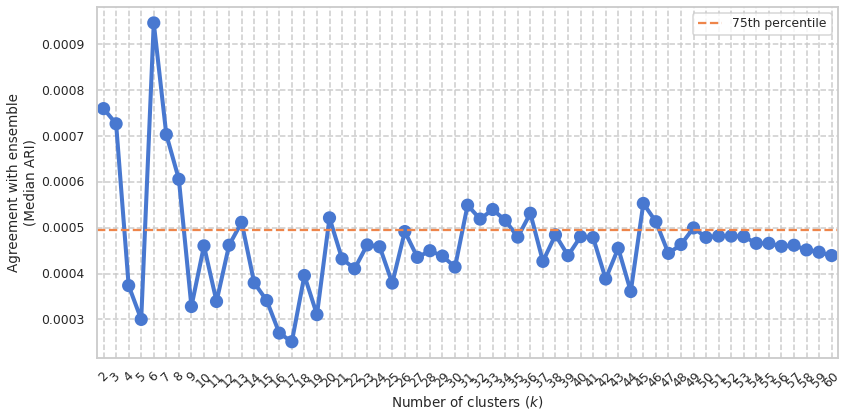

In [34]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel(f"Agreement with ensemble\n({_selected_stat} {_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

The horizontal line in the plot is the median of the average agreement value; partitions above that line are marked as selected for downstream analysis

In [35]:
# this list shows the selected final partitions, and which methods achieved the highest agreement
plot_data[plot_data["selected"]].sort_values("k")

,k,method,partition,ari_median,selected
1,2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000759,True
2,3,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000726,True
0,6,scc_050,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.000946,True
3,7,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000703,True
4,8,scc_050,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000605,True
13,13,scc_020,"[1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.000512,True
9,20,scc_025,"[0, 0, 0, 9, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.000521,True
6,31,scc_050,"[21, 21, 18, 21, 21, 21, 21, 21, 21, 21, 21, 2...",0.000549,True
10,32,scc_050,"[17, 17, 26, 17, 17, 17, 17, 17, 17, 17, 17, 1...",0.000519,True
7,33,scc_050,"[11, 11, 24, 11, 11, 11, 11, 11, 11, 11, 11, 1...",0.000540,True


From the two evidence accumulation approaches (EAC) we are using, the spectral clustering based one does it better for almost all `k` values, whereas the hierarchical clustering based approach seems to do a little bit better for lower `k`.